In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def laplacian_filter(image):
    laplacian_result = cv2.Laplacian(image, cv2.CV_64F)
    laplacian_result = cv2.convertScaleAbs(laplacian_result)

    return laplacian_result

def sharpen_image(image, k=1):
    laplacian_result = laplacian_filter(image)
    sharpened_image = cv2.addWeighted(image, 1 + k, laplacian_result, -k, 0)

    return sharpened_image

In [8]:
# Load the original image
image_path = r".\Xray_Board.jpg"
original_image = cv2.imread(image_path)

In [9]:

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Sharpen the image with default k=1
sharpened_image = sharpen_image(gray_image)

# Convert the images from BGR to RGB (for displaying with matplotlib)
image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
sharpened_rgb = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB)


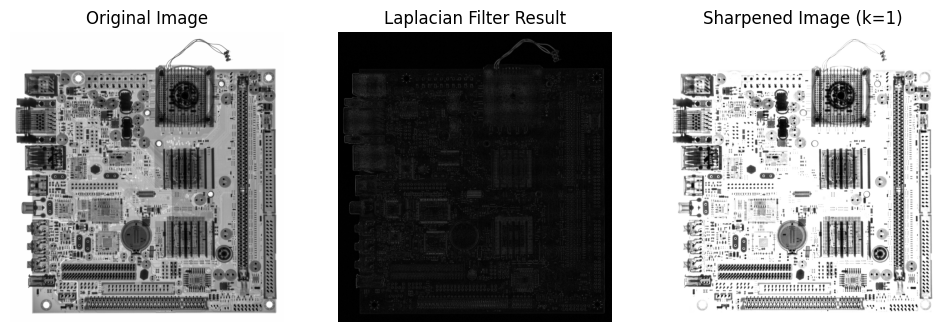

In [10]:
# Display the images using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Laplacian Filter Result')
plt.imshow(laplacian_filter(gray_image), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Sharpened Image (k=1)')
plt.imshow(sharpened_rgb)
plt.axis('off')

plt.show()